# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pickle
SEED = 42
np.random.seed(SEED) # Numpy
random.seed(SEED) # Random module

# Аларм: дефолтное сидирование не работало нормально (см. чатик +
# не работал по дефолту df.sample(), так что я сделал свое (но оно
# будто бы тоже не идеально работает).

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Обеспечиваем воспроизводимость данных.")

Обеспечиваем воспроизводимость данных.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('Data/cars_train.csv')
df_test = pd.read_csv('Data/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [5]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [6]:
df_test.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
233,Maruti Swift ZDi,2014,430000,90000,Diesel,Individual,Manual,First Owner,22.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
989,Maruti Wagon R VXI BS IV,2008,135000,90000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
120,Mahindra Bolero Power Plus SLX,2017,620000,100000,Diesel,Individual,Manual,Second Owner,16.5 kmpl,1493 CC,70 bhp,195Nm@ 1400-2200rpm,7.0
171,Maruti Swift VDI,2019,630000,15000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
243,Ford EcoSport 1.5 Petrol Titanium BSIV,2017,889000,25000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1497 CC,121.31 bhp,150Nm@ 4500rpm,5.0
612,Tata Indica GLS BS IV,2007,78000,38000,Petrol,Individual,Manual,Second Owner,15.3 kmpl,1193 CC,65.3 bhp,102Nm@ 2600rpm,5.0
957,Hyundai Grand i10 Magna,2016,420000,30000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
382,Maruti Alto LXi,2009,155000,54000,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
60,Toyota Etios VX,2017,625000,25538,Petrol,Trustmark Dealer,Manual,First Owner,16.78 kmpl,1496 CC,88.73 bhp,132Nm@ 3000rpm,5.0
266,Mahindra Bolero SLX,2011,340000,100000,Diesel,Individual,Manual,Second Owner,13.6 kmpl,2523 CC,63 bhp,180 Nm at 1440-1500rpm,7.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [8]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [9]:
print(f'Train: {[i for i in df_train.columns if df_train[i].isnull().any()]}')
print(f'Test: {[i for i in df_test.columns if df_test[i].isnull().any()]}')

Train: ['mileage', 'engine', 'max_power', 'torque', 'seats']
Test: ['mileage', 'engine', 'max_power', 'torque', 'seats']


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [10]:
print(f'Train: {df_train.drop("selling_price", axis=1).duplicated().sum()}')
print(f'Test: {df_test.drop("selling_price", axis=1).duplicated().sum()}')

Train: 1159
Test: 69


(0.15 балла) <font color='#9933CC'>Отобразите повторяющиеся автомобили</font>

In [11]:
df_train[df_train.drop("selling_price", axis=1).duplicated()]
df_test[df_test.drop("selling_price", axis=1).duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
200,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
221,Volkswagen Vento 1.5 Highline Plus AT 16 Alloy,2018,885000,75000,Diesel,Individual,Automatic,First Owner,21.5 kmpl,1498 CC,108.5 bhp,250Nm@ 1500-3000rpm,5.0
235,Hyundai Grand i10 1.2 CRDi Sportz,2017,450000,56290,Diesel,Dealer,Manual,First Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0
238,Toyota Camry 2.5 Hybrid,2016,2000000,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
253,Tata Safari Storme EX,2015,503000,110000,Diesel,Individual,Manual,First Owner,14.1 kmpl,2179 CC,147.94 bhp,320Nm@ 1500-3000rpm,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
936,BMW X4 M Sport X xDrive20d,2019,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
949,Toyota Camry 2.5 Hybrid,2016,2000000,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
971,Maruti Ertiga SHVS ZDI Plus,2017,750000,50000,Diesel,Individual,Manual,First Owner,24.52 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,7.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то первую строку по этому автомобилю

In [12]:
df_train = df_train[~df_train.drop("selling_price", axis=1).duplicated()]
#df_test = df_test[~df_test.drop("selling_price", axis=1).duplicated()] # Видимо, в тесте не надо было..

In [13]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [14]:
for df in [df_train, df_test]:
    df.reset_index(drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [15]:
def process_mileage(x):
    if x is not None:
        x = str(x)
        if 'kmpl' in x:
            return float(x[:x.find(' kmpl')])
        elif 'km/kg' in x:
            return float(x[:x.find(' km/kg')])
    else:
        return x

In [16]:
df_train.mileage = df_train.mileage.apply(process_mileage)
df_test.mileage = df_test.mileage.apply(process_mileage)

In [17]:
def process_engine(x):
    if x is not None:
        x = str(x)
        if 'CC' in x:
            return int(x[:x.find(' CC')])
    else:
        return x

In [18]:
df_train.engine = df_train.engine.apply(process_engine)
df_test.engine = df_test.engine.apply(process_engine)

In [19]:
def process_max_power(x):
    if x is not None:
        x = str(x)
        if 'bhp' in x:
            # One item seems to be ' bhp' so we treat it as None
            try:
                return float(x[:x.find(' bhp')])
            except:
                return None
    else:
        return x

In [20]:
df_train.max_power = df_train.max_power.apply(process_max_power)
df_test.max_power = df_test.max_power.apply(process_max_power)

In [21]:
df_train.drop('torque', inplace=True, axis=1)
df_test.drop('torque', inplace=True, axis=1)

In [22]:
#df_train.torque.unique()

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [23]:
df_train.fillna(df_train.median(), inplace=True)
df_test.fillna(df_train.median(), inplace=True)

df_train.isna().sum(), df_test.isna().sum()

C:\Users\f3ss1\AppData\Local\Temp\ipykernel_11680\910748030.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.fillna(df_train.median(), inplace=True)
C:\Users\f3ss1\AppData\Local\Temp\ipykernel_11680\910748030.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test.fillna(df_train.median(), inplace=True)


(name             0
 year             0
 selling_price    0
 km_driven        0
 fuel             0
 seller_type      0
 transmission     0
 owner            0
 mileage          0
 engine           0
 max_power        0
 seats            0
 dtype: int64,
 name             0
 year             0
 selling_price    0
 km_driven        0
 fuel             0
 seller_type      0
 transmission     0
 owner            0
 mileage          0
 engine           0
 max_power        0
 seats            0
 dtype: int64)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

Потому что формально `seats` может принимать только одно из нескольких значений (не бывает бесконечно мест или 123123123 мест или -3 места)

In [24]:
df_train.engine = df_train.engine.astype('int64')
df_train.seats = df_train.seats.astype('int64')
df_test.engine = df_test.engine.astype('int64')
df_test.seats = df_test.seats.astype('int64')


columns = df_train.columns
columns = list(columns.drop('selling_price')) + ['selling_price']

df_train = df_train[columns].reset_index(drop=True)
df_test = df_test[columns].reset_index(drop=True)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

<Figure size 1000x1000 with 0 Axes>

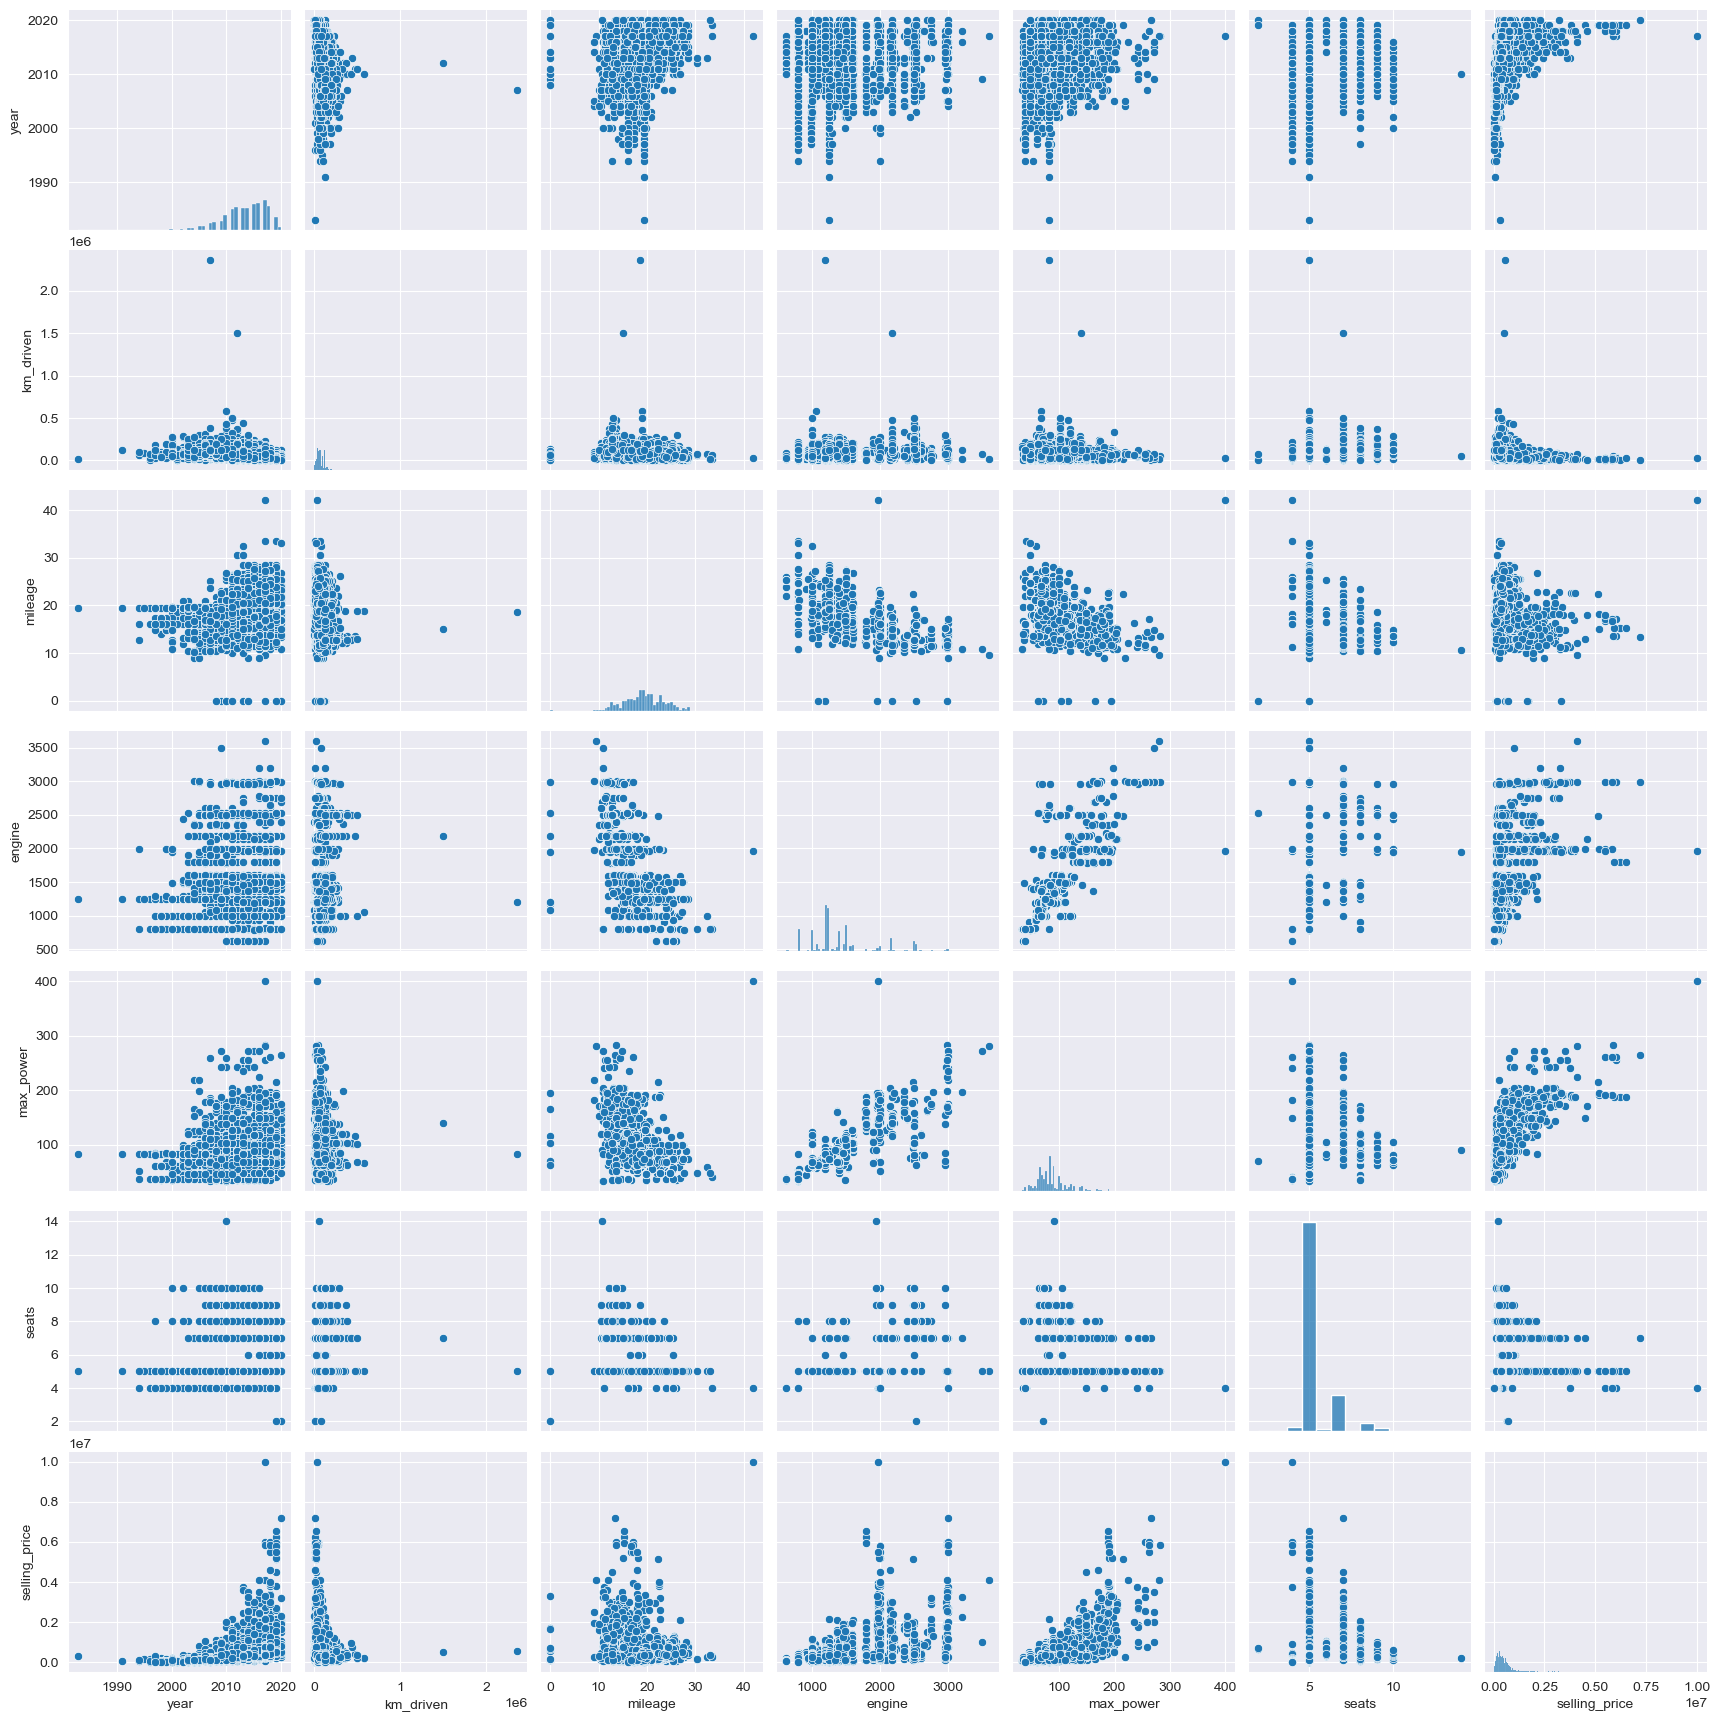

In [27]:
plt.figure(figsize=(10, 10))
sns.pairplot(df_train)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной? </font>
    * Ну как-то вяло, если честно. Какой-то тренд есть у таргета и `max_power`, а также `engine`.
* <font color='#FF6600'> А о корреляциях признаков? </font>
    * Переменные `engine` и `max_power` явно коррелируют. Есть какая-то недозависимость между переменными `engine` и `mileage`, а также `mileage` и `max_power`.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>
- Ну в целом да.

<Figure size 1000x1000 with 0 Axes>

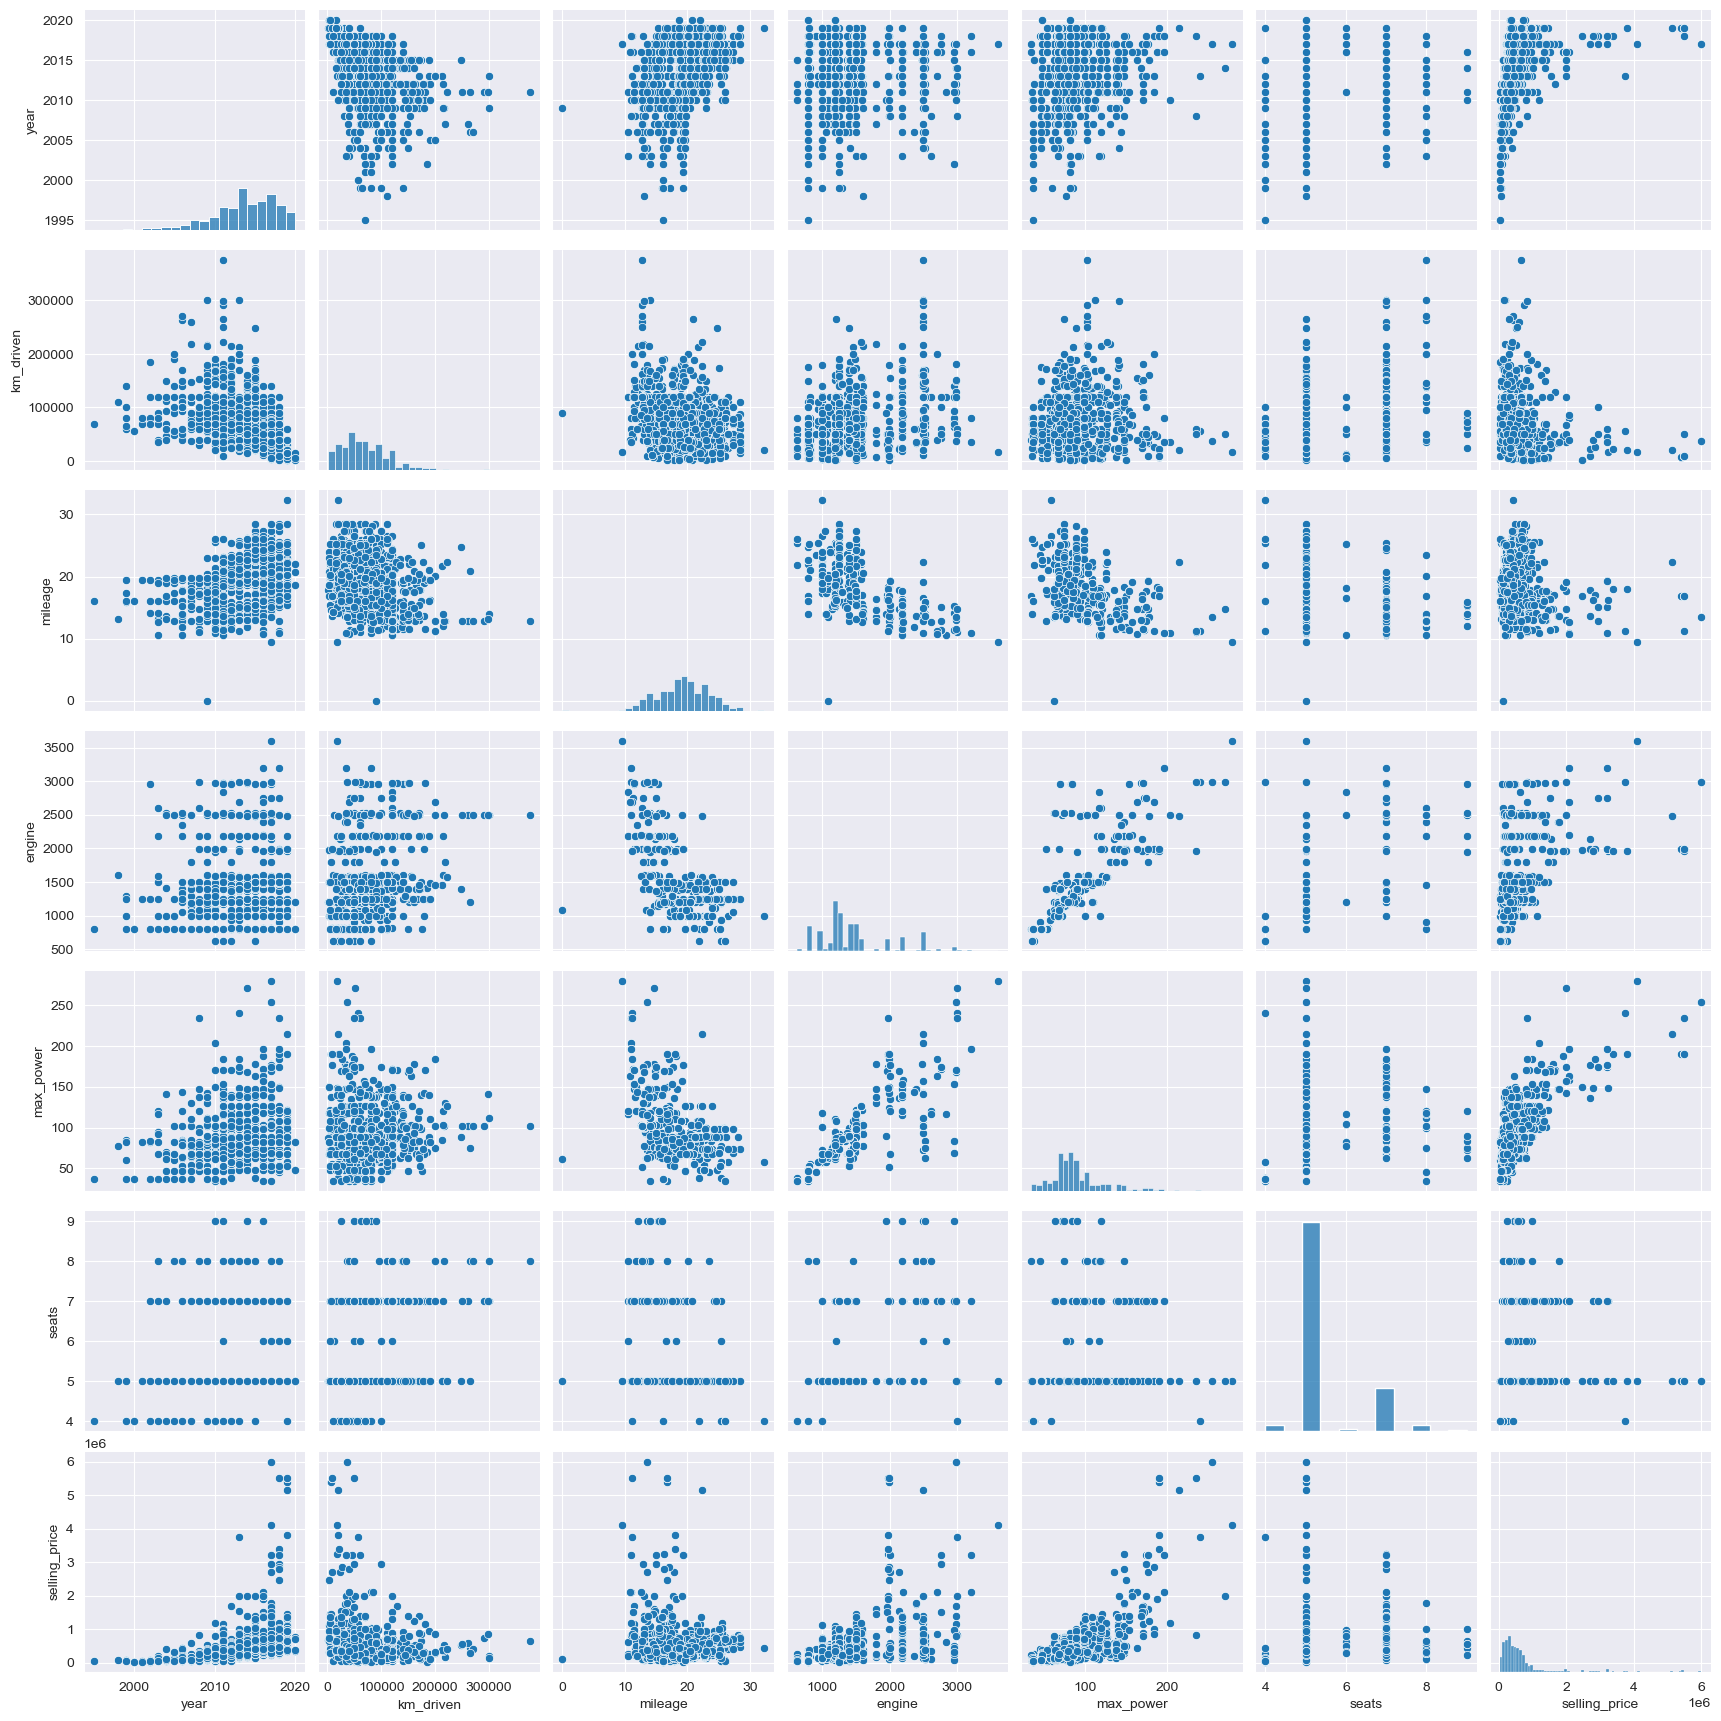

In [28]:
plt.figure(figsize=(10, 10))
sns.pairplot(df_test)
plt.show()

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [29]:
NUMERIC_COLUMNS = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

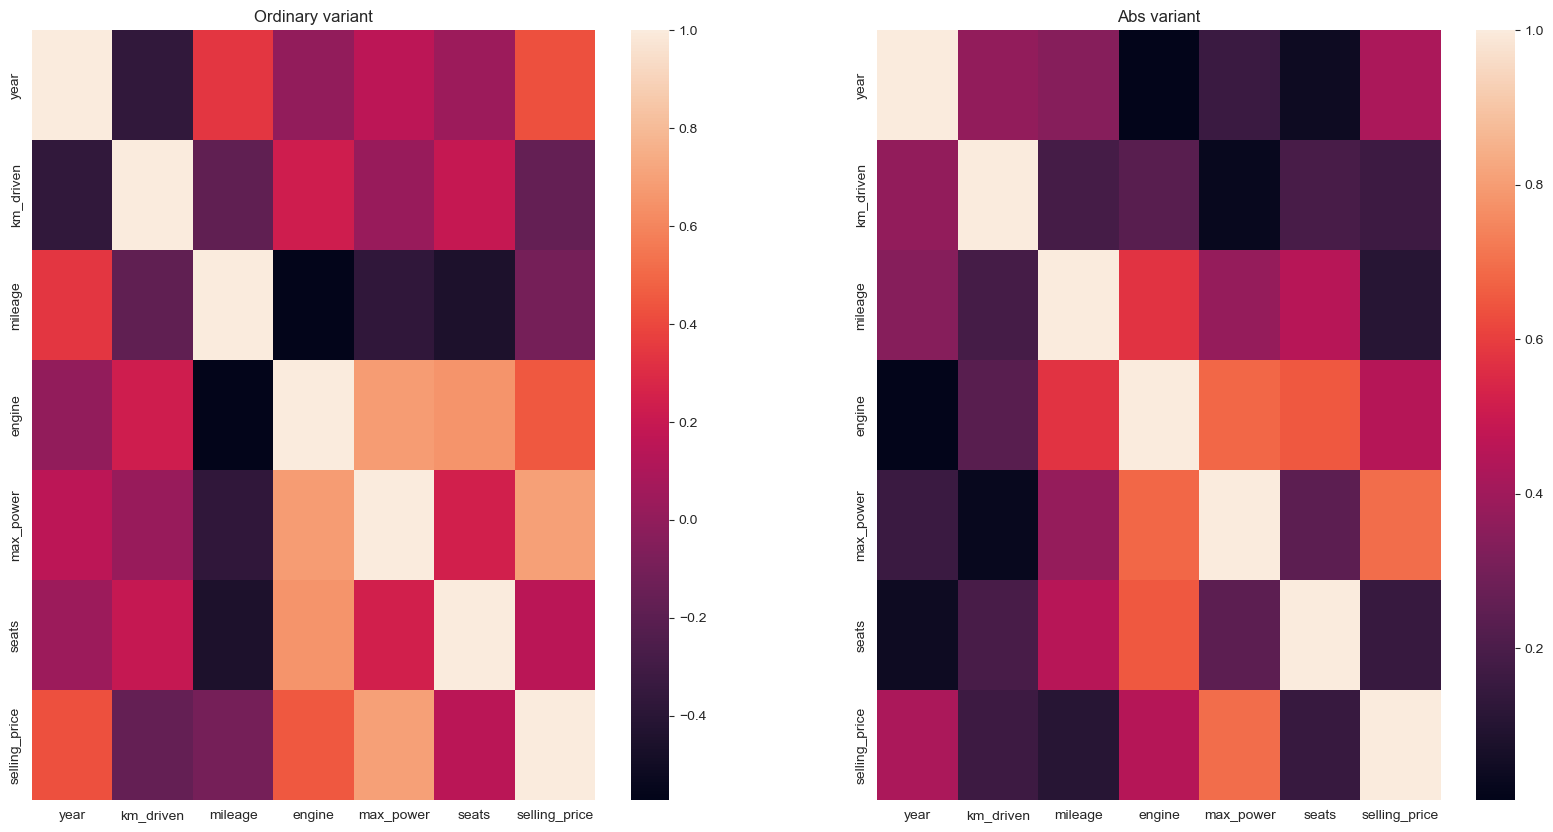

In [30]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Ordinary variant')
sns.heatmap(df_train[NUMERIC_COLUMNS].corr())
plt.subplot(1, 2, 2)
plt.title('Abs variant')
sns.heatmap(abs(df_train[NUMERIC_COLUMNS].corr()))
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
    * `engine` и `year`. Чтобы удобно это посмотреть, я взял `abs()` от матрицы корреляции.
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
    * `max_power` и `engine`, хотя на `pairplot` это откровенно говоря было не очень видно. Но там вообще их несколько, видно из графика.
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>
    * Да. Сначала я написал, что нет, но потом вспомнил, что у меня взят `abs()` от матрицы, если посмотреть исходную, то все ок :)

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

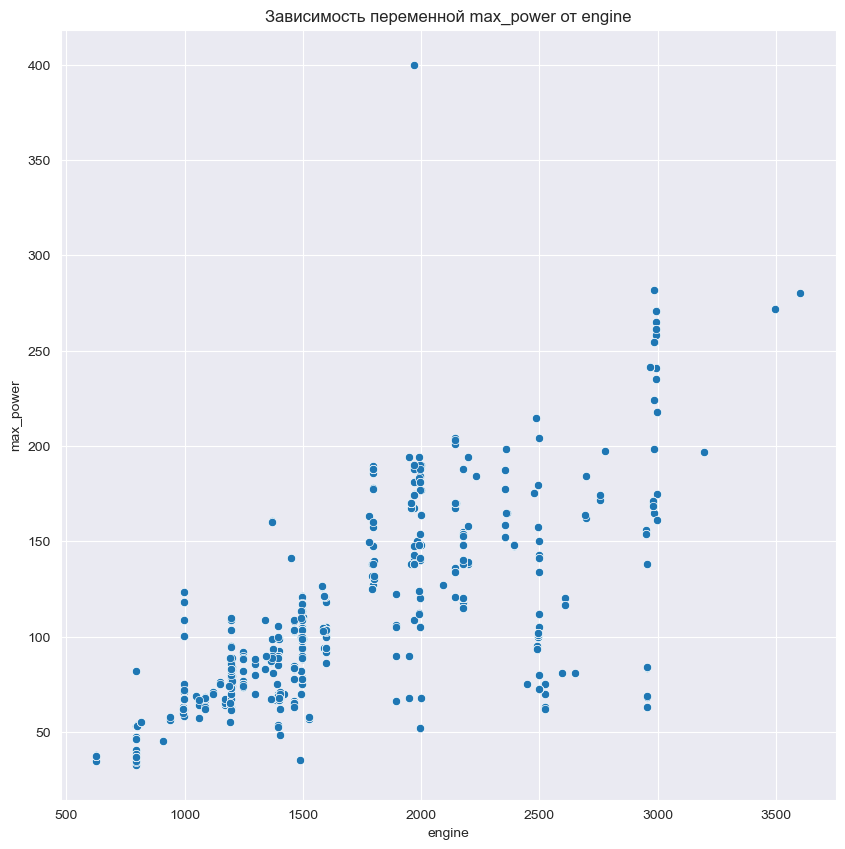

In [31]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='engine', y='max_power', data=df_train)
plt.title('Зависимость переменной max_power от engine')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

- Странно не рисовать максимально антикоррелирующие пары признаков тоже, так что вот вам она.

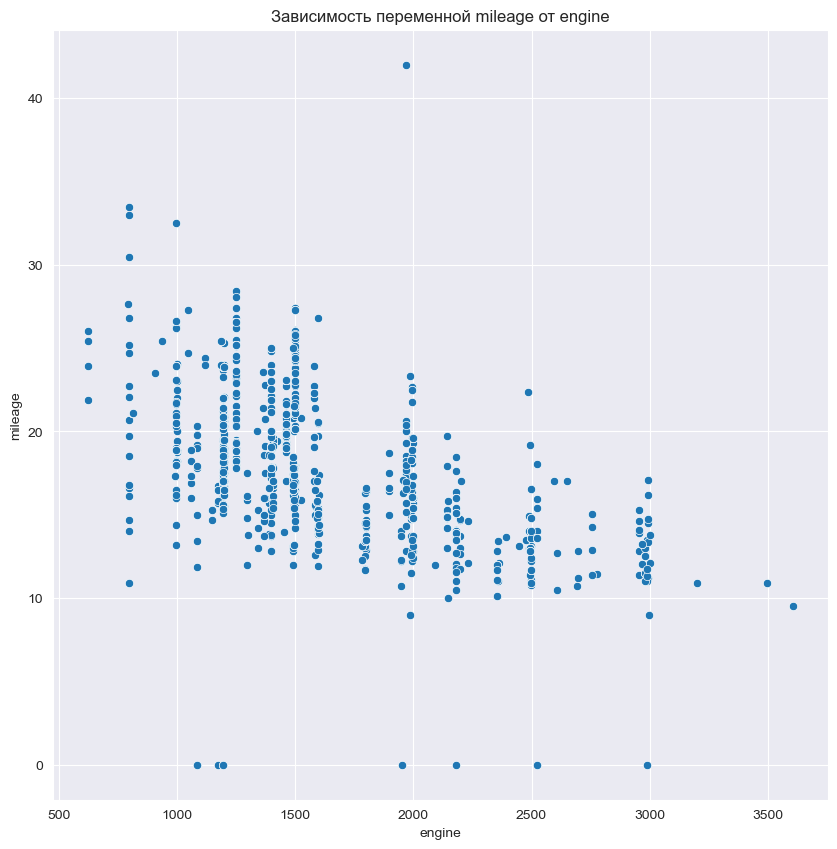

In [32]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='engine', y='mileage', data=df_train)
plt.title('Зависимость переменной mileage от engine')
plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [33]:
y_train = df_train.selling_price
X_train = df_train[NUMERIC_COLUMNS[:-1]]

In [34]:
assert X_train.shape == (5840, 6)

In [35]:
y_test = df_test.selling_price
X_test = df_test[NUMERIC_COLUMNS[:-1]]

In [36]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)

r2_score(y_test, predictions), MSE(y_test, predictions)

(0.5946576472666429, 233002359160.80444)

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)

r2_score(y_test, predictions), MSE(y_test, predictions)

(0.5946576472666552, 233002359160.7975)

Не очень результативно.

Зато уже сейчас можем интерпретировать модель.

<font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

- `max_power` будто бы.

In [39]:
NUMERIC_COLUMNS[linear_model.coef_.argmax()]

'max_power'

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [40]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
predictions = lasso_model.predict(X_test)

r2_score(y_test, predictions), MSE(y_test, predictions)

(0.5946564811772821, 233003029462.26755)

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>
- Нет. Честно, не до конца ясно почему: то ли просто таргет огромный и регуляризация имеет маленький коэффициент, то ли еще что-то. Но потом оптимальным тоже является не очень большой коэф..

In [41]:
lasso_model.coef_

array([152247.14742736, -44065.05085353,  29317.30055383,  59320.137094  ,
       324497.75189092, -22156.30524519])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится фукнция [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [42]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    'alpha': np.logspace(np.log(1e-4), np.log(10), 10, base=np.e),
    'fit_intercept': [True, False],
    'max_iter': [500, 1000, 1500, 2000, 10000],
    'tol': np.logspace(np.log(1e-8), np.log(1e-3), 5, base=np.e),
    'positive': [True, False],
    'selection': ['cyclic', 'random']
}

model_lasso = Lasso()

In [43]:
grid_search = GridSearchCV(model_lasso, params_grid, cv=10, n_jobs=-1, verbose=1.5)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01]),
                         'fit_intercept': [True, False],
                         'max_iter': [500, 1000, 1500, 2000, 10000],
                         'positive': [True, False],
                         'selection': ['cyclic', 'random'],
                         'tol': array([1.00000000e-08, 1.77827941e-07, 3.16227766e-06, 5.62341325e-05,
       1.00000000e-03])},
             verbose=1.5)

In [44]:
best_lasso = grid_search.best_params_
model = Lasso(**best_lasso)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

r2_score(y_test, predictions), MSE(y_test, predictions)

(0.5818161029965927, 240384045505.72464)

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

20000, так он еще и качество ухудшил, осуждаю

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>
Да, занулились!

In [45]:
best_lasso['alpha']

10.000000000000002

In [46]:
model.coef_

array([165769.63978817,      0.        ,  27878.66188623,  23427.02819004,
       339816.57239063,      0.        ])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [47]:
from sklearn.linear_model import ElasticNet

params_grid = {
    'alpha': np.logspace(np.log(1e-4), np.log(10), 10, base=np.e),
    'l1_ratio': np.linspace(0, 1, 10),
    'fit_intercept': [True, False],
    'max_iter': [500, 1000, 1500, 2000, 10000],
    'tol': np.logspace(np.log(1e-8), np.log(1e-3), 5, base=np.e),
    'positive': [True, False],
    'selection': ['cyclic', 'random']
}

model_elastic = ElasticNet()

In [48]:
%%time

grid_search_elastic = GridSearchCV(model_elastic, params_grid, cv=10, n_jobs=-1, verbose=1.5)
grid_search_elastic.fit(X_train, y_train)
best_elastic = grid_search_elastic.best_params_
best_elastic

Fitting 10 folds for each of 20000 candidates, totalling 200000 fits
CPU times: total: 1min 8s
Wall time: 3min 28s


{'alpha': 0.21544346900318836,
 'fit_intercept': True,
 'l1_ratio': 0.4444444444444444,
 'max_iter': 500,
 'positive': True,
 'selection': 'random',
 'tol': 0.0010000000000000007}

In [49]:
model = ElasticNet(**best_elastic)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

r2_score(y_test, predictions), MSE(y_test, predictions)

(0.5527590147918973, 257086889549.4886)

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

Оно эволюционирует, но наоборот...

In [50]:
best_elastic

{'alpha': 0.21544346900318836,
 'fit_intercept': True,
 'l1_ratio': 0.4444444444444444,
 'max_iter': 500,
 'positive': True,
 'selection': 'random',
 'tol': 0.0010000000000000007}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [51]:
X_train_cat = df_train.drop('name', axis=1).drop('selling_price', axis=1)
X_test_cat = df_test.drop('name', axis=1).drop('selling_price', axis=1)

In [52]:
assert X_train_cat.shape == (5840, 10)

In [53]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


In [54]:
CATEGORICAL_FEATURES = ['fuel', 'seller_type', 'transmission', 'owner']

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

Я выбрал иной путь самуря так что предыдущий шаг немного бесполезный..

In [55]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(X_train_cat[CATEGORICAL_FEATURES])
encoded_train = pd.DataFrame(encoder.transform(X_train_cat[CATEGORICAL_FEATURES]))
encoded_test = pd.DataFrame(encoder.transform(X_test_cat[CATEGORICAL_FEATURES]))
X_train_cat = pd.concat((df_train[NUMERIC_COLUMNS], encoded_train), axis=1).drop('selling_price', axis=1)
X_test_cat = pd.concat((df_test[NUMERIC_COLUMNS], encoded_test), axis=1).drop('selling_price', axis=1)

In [56]:
scaler = StandardScaler()

X_train_cat[NUMERIC_COLUMNS[:-1]] = scaler.fit_transform(X_train_cat[NUMERIC_COLUMNS[:-1]])
X_train_cat

,year,km_driven,mileage,engine,max_power,seats,0,1,2,3,4,5,6,7,8,9
0,0.139570,1.191152,0.995867,-0.373643,-0.441753,-0.434419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.139570,0.766619,0.428830,0.141162,0.493159,-0.434419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.837167,0.883158,0.895506,-0.068879,0.064974,-0.434419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.569719,0.766619,-0.835712,-0.270682,0.007968,-0.434419,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.872122,-0.482007,0.177929,-0.478663,-0.192823,-0.434419,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,-1.325535,1.948653,-0.379072,-0.707236,-0.818631,-0.434419,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5836,-0.104614,-0.398765,-0.133189,-0.888447,-0.660279,-0.434419,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5837,-0.104614,0.600136,-0.233549,-0.478663,-0.161469,-0.434419,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5838,-1.569719,0.749971,-0.660081,0.130865,0.698383,-0.434419,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [57]:
X_test_cat[NUMERIC_COLUMNS[:-1]] = scaler.transform(X_test_cat[NUMERIC_COLUMNS[:-1]])
X_test_cat

,year,km_driven,mileage,engine,max_power,seats,0,1,2,3,4,5,6,7,8,9
0,-0.837167,1.565740,-1.362605,2.200379,0.761724,1.601702,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.872122,-0.814974,0.519155,0.139102,0.650878,-0.434419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.569719,2.405866,-1.638596,0.760986,1.331792,-0.434419,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.383754,1.648982,1.422399,0.141162,0.337340,-0.434419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.592983,-0.065798,-0.735352,-0.530144,-0.726787,-0.434419,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.325535,0.433652,0.095132,-0.707236,-0.630192,-0.434419,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
996,0.872122,-0.398765,-0.208459,-0.478663,-0.193773,-0.434419,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
997,-1.081351,-0.565249,0.895506,-0.068879,0.064974,-0.434419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
998,-0.348799,-0.814974,0.233127,-0.478663,-0.286568,-0.434419,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>
Ну стало получше, факт)

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params_grid = {
    'alpha': np.linspace(0.5, 1000, 30)
}

model = Ridge()

In [59]:
%%time

grid_search_ridge = GridSearchCV(model, params_grid, cv=10, n_jobs=-1, verbose=1.5)
grid_search_ridge.fit(X_train_cat, y_train)
best_ridge = grid_search_ridge.best_params_
best_ridge

Fitting 10 folds for each of 30 candidates, totalling 300 fits
CPU times: total: 422 ms
Wall time: 399 ms


C:\ProgramData\Miniconda3\envs\MLDS_ML_HW1\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


{'alpha': 138.36206896551724}

In [60]:
model = Ridge(**best_ridge)
model.fit(X_train_cat, y_train)
pickle.dump(model, open('models/model.pkl','wb'))

predictions = model.predict(X_test_cat)

r2_score(y_test, predictions), MSE(y_test, predictions)

C:\ProgramData\Miniconda3\envs\MLDS_ML_HW1\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Miniconda3\envs\MLDS_ML_HW1\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


(0.6306726711056645, 212299895026.13556)

In [61]:
predictions

array([ 6.28022948e+05,  8.86866246e+05,  7.92266263e+05,  6.59609772e+05,
        1.12905716e+05,  1.09270059e+06,  1.51385655e+05,  3.41883279e+05,
       -7.36699451e+04,  9.87091241e+05,  1.30937432e+06,  2.27991166e+06,
        9.24971795e+05,  2.19342264e+05,  6.71541819e+05,  2.73329531e+06,
        5.34092566e+05,  2.08845043e+05,  5.08303281e+05,  4.71822825e+05,
        2.86279150e+05,  2.43642049e+04,  9.43854029e+05,  3.13656165e+05,
        5.86381387e+05,  8.14310591e+05,  9.91402975e+05,  1.03530696e+06,
        4.02409234e+05,  5.97766198e+05,  1.02377306e+06,  1.09459683e+06,
        5.51337866e+05,  5.19483107e+05,  3.71583767e+05,  3.48727163e+05,
        7.12789936e+05,  3.56239479e+05,  6.29763592e+05,  1.07742698e+06,
        2.97217801e+05,  4.05915997e+05,  2.64497438e+05,  3.56574980e+05,
        3.51367328e+05,  2.90211853e+05,  2.39203033e+05,  2.09884420e+05,
        5.08810855e+05,  6.99087331e+05,  1.72189169e+05,  2.41000833e+05,
        6.58952047e+05,  

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [62]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [63]:
def business_metrics(y_true, y_pred):
    return (np.abs(y_true - y_pred) / y_true <= 0.1).sum() / len(y_true)

business_metrics(y_test, predictions) # your code here

0.223

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [64]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* .ipynb-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* .py-файл с реализацией сервиса
* .pickle-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* .md-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит readme.md:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали до сюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link